# **`Chapter 2: Special Discrete Random Variables`**

**Table of Content:**

- [Import Libraries](#Import_Libraries)
- [2.1. Bernoulli Distribution](#Bernoulli_Distribution)
- [2.2. Binomial Distribution](#Binomial_Distribution)
- [2.3. Negative Binomial (Pascal) Distribution](#Negative_Binomial_Distribution)
- [2.4. Geometric Distribution](#Geometric_Distribution)
- [2.5. Poisson Distribution](#Poisson_Distribution)
- [2.6. Discrete Uniform Distribution](#Discrete_Uniform_Distribution)
- [2.7. Hypergeometric Distribution](#Hypergeometric_Distribution)

<a name='Import_Libraries'></a>

## **Import Libraries**

In [1]:
!pip install --upgrade scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest
from scipy.integrate import quad
from IPython.display import display, Latex

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

<a name='Bernoulli_Distribution'></a>

## **2.1. Bernoulli Distribution:**

Suppose that an experiment, whose outcome can be classified as either a “success” or as a “failure” is performed. If we let $X = 1$ when the outcome is a success and $X = 0$ when it is a failure, then the probability mass function of $X$ is given by:

$P(X=x) =\begin{cases}p & x = 1\\1-p = q & x = 0\end{cases}$

or

$P(X=x) = p^x(1-p)^{1-x} \quad \quad x = 0,1$

$\\ $

$E(X) = p$

$Var(X) = p(1-p)$

$Median(X) = \begin{cases}0 & p < \frac{1}{2}\\{[0,1]} & p = \frac{1}{2} \\1 & p > \frac{1}{2}\end{cases}$

$Mode(X) = \begin{cases}0 & p < \frac{1}{2}\\{[0,1]} & p = \frac{1}{2} \\1 & p > \frac{1}{2}\end{cases}$

$Skewness(X) = \frac{1-2p}{\sqrt{p(1-p)}}$

$Kurtosis(X) = \frac{6p^2-6p+1}{p(1-p)} = \frac{1-6pq}{p(1-p)}$

$\\ $

Moment-generating function:

$M_{x}(t) = p\ e^t + q$

$\\ $

$CDF = F(X=x) = \begin{cases}0 & x < 0\\1-p & 0\leq x< 1 \\1 & x > 0\end{cases}$

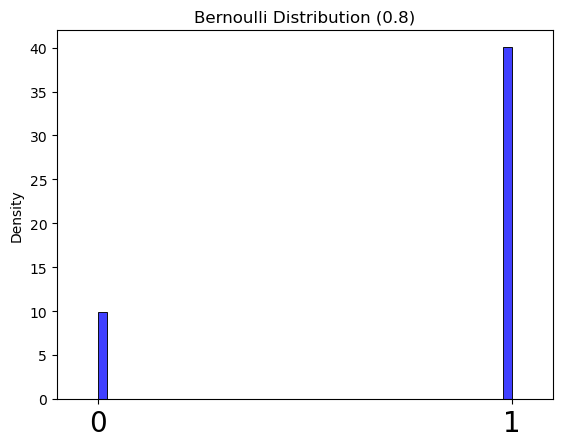

In [3]:
np.random.seed(1)
N = 1000000
p = 0.8

ber_data = np.random.binomial(n = 1, p = p, size = N)

sns.histplot(ber_data, color='b', stat='density', bins=50)
plt.xlim(-0.1,1.1)
plt.xticks([0,1], fontsize=20, ha='center')
plt.title(f'Bernoulli Distribution ({p})');

In [4]:
p = 0.8
print(f'The mean of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.mean(p = p), 4))
print(f'The median of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.median(p = p), 4))
print(f'The variance of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.var(p = p), 4))
print(f'The standard deviation of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.std(p = p), 4))
print(f'The skewness of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.stats(p, moments='mvsk')[2], 4))
print(f'The kurtosis of the Bernoulli(P={p}) Distribution is: ', np.round(bernoulli.stats(p, moments='mvsk')[3], 4))

The mean of the Bernoulli(P=0.8) Distribution is:  0.8
The median of the Bernoulli(P=0.8) Distribution is:  1.0
The variance of the Bernoulli(P=0.8) Distribution is:  0.16
The standard deviation of the Bernoulli(P=0.8) Distribution is:  0.4
The skewness of the Bernoulli(P=0.8) Distribution is:  -1.5
The kurtosis of the Bernoulli(P=0.8) Distribution is:  0.25


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

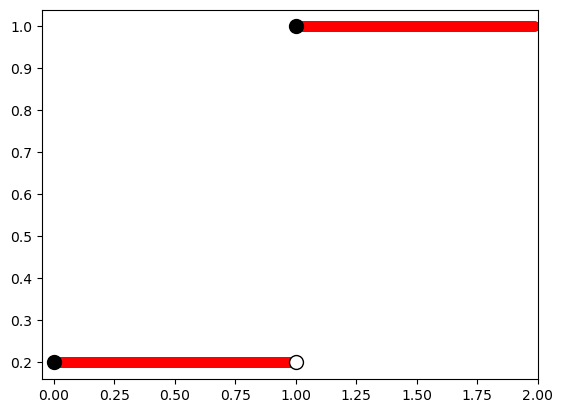

In [5]:
x = np.arange(0, 1.99, 0.001)
x1 = np.arange(0, 2)
x2 = np.arange(0, 1) + 0.999

plt.scatter(x, bernoulli.cdf(x, p=p), color = 'r')
plt.scatter(x2, bernoulli.cdf(x2, p=p), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, bernoulli.cdf(x1, p=p), color = 'black', edgecolor='black', s=100)
plt.xlim(-0.05,2);

To find the left probability of a point use the code below:

''
bernoulli.cdf($X,P$)
''

To find the right probability of a point use the code below:

''
bernoulli.sf($X,P$)
''

In [6]:
X = 0.5
p = 0.2
print(f'The left probability of *{X}* in the B({p}) Distribution is: ', bernoulli.cdf(X, p=p))
print(f'The Right probability of *{X}* in the B({p}) Distribution is: ', bernoulli.sf(X, p=p))

The left probability of *0.5* in the B(0.2) Distribution is:  0.8
The Right probability of *0.5* in the B(0.2) Distribution is:  0.2


To find the probability of a point use the code below:

''
bernoulli.pmf($X,P$)
''

In [7]:
X = 1
p = 0.2
print(f'The probability of *X={X}* in the B({p}) Distribution is: ', bernoulli.pmf(X, p=p))

The probability of *X=1* in the B(0.2) Distribution is:  0.2


If $X \sim Ber(P) \quad$ then $\quad Y_1 = X^n \sim Ber(P)$

If $X \sim Ber(P) \quad$ then $\quad Y_2 = 1-X \sim Ber(1-P)$

If $X \sim Ber(P) \quad$ then $\quad Y_3 = 1-X^n \sim Ber(1-P)$

If $X \sim Ber(P) \quad$ then $\quad Y_4 = {(1-X)}^n \sim Ber(1-P)$

If $X_1, X_2, ..., X_n \sim Ber(P) \quad$ then $\quad Y_5 = Min(X_1, X_2, ..., X_n) \sim Ber(P^n)$

If $X_1, X_2, ..., X_n \sim Ber(P) \quad$ then $\quad Y_6 = Max(X_1, X_2, ..., X_n) \sim Ber(1-q^n)$

If $X_1, X_2, ..., X_n \sim Ber(P) \quad$ then $\quad Y_7 = X_1 \times X_2\times ...\times X_n \sim Ber(P^n)$

If $Y_1 = Min(X_1, X_2, ..., X_n), Y_2 = Max(X_1, X_2, ..., X_n) \quad$ then $\quad Y_8 = {Y_1}{Y_2} \sim Ber(P^n)$

<a name='Binomial_Distribution'></a>

## **2.2. Binomial Distribution:**

Suppose now that $n$ independent trials, each of which results in a “success” with probability $p$ and in a “failure” with probability $1 − p$, are to be performed. If $X$ represents the number of successes that occur in the $n$ trials, then $X$ is said to be a binomial random variable with parameters $(n, p)$.

$P(X=i) = \binom{i}{n} p^i (1-p)^{n-i} \quad \quad x = 0,1,...,n$

$\\ $

$E(X) = np$

$Var(X) = np(1-p)$

$Skewness(X) = \frac{q-p}{\sqrt{npq}}$

$Kurtosis(X) = \frac{1-6pq}{npq}$

$Mode(X) = \begin{cases}(n+1)p,(n+1)p-1 & if(n+1)p \in integer \\ [(n+1)p] & if(n+1)p \not\in integer \end{cases}$

$\\ $

Moment-generating function:

$M_{x}(t) = (pe^t + q)^n$

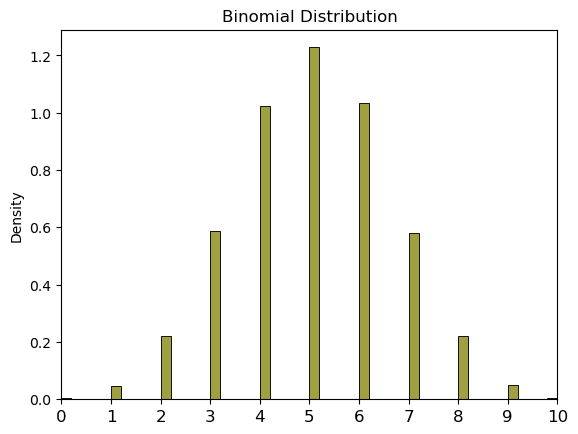

In [8]:
np.random.seed(1)
N = 1000000
n, p = [10, 0.5]

binom_data = np.random.binomial(n = n, p = p, size = N)

sns.histplot(binom_data, color='olive', stat='density', bins=50)

plt.xlim(0,n)
plt.xticks(list(range(0,n+1)), fontsize=12, ha='center')
plt.title('Binomial Distribution');

In [9]:
def mode_binom(n,p):
  if math.modf((n+1)*p)[0] == 0.0:
    return (n+1)*p, (n+1)*p-1
  else:
    return np.floor((n+1)*p)

In [10]:
n, p = [10, 0.5]
print(f'The mean of the B({n},{p}) Distribution is: ', np.round(binom.mean(p = p, n = n), 4))
print(f'The median of the B({n},{p}) Distribution is: ', np.round(binom.median(p = p, n = n), 4))
print(f'The variance of the B({n},{p}) Distribution is: ', np.round(binom.var(p = p, n = n), 4))
print(f'The standard deviation of the B({n},{p}) Distribution is: ', np.round(binom.std(p = p, n = n), 4))
print(f'The mode of the B({n},{p}) Distribution is: ', np.round(mode_binom(p = p, n = n), 4))
print(f'The skewness of the B({n},{p}) Distribution is: ', np.round(binom.stats(p = p, n = n, moments='mvsk')[2], 4))
print(f'The kurtosis of the B({n},{p}) Distribution is: ', np.round(binom.stats(p = p, n = n, moments='mvsk')[3], 4))

The mean of the B(10,0.5) Distribution is:  5.0
The median of the B(10,0.5) Distribution is:  5.0
The variance of the B(10,0.5) Distribution is:  2.5
The standard deviation of the B(10,0.5) Distribution is:  1.5811
The mode of the B(10,0.5) Distribution is:  5.0
The skewness of the B(10,0.5) Distribution is:  0.0
The kurtosis of the B(10,0.5) Distribution is:  -0.2


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

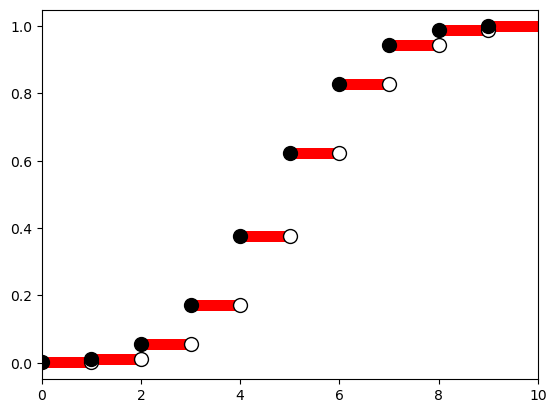

In [11]:
x = np.arange(0, n, 0.001)
x1 = np.arange(0, n)
x2 = np.arange(0, n-1) + 0.999

plt.scatter(x, binom.cdf(x, p=p, n=n), color = 'r')
plt.scatter(x2, binom.cdf(x2, p=p, n=n), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, binom.cdf(x1, p=p, n=n), color = 'black', edgecolor='black', s=100)
plt.xlim(0,n);

The binomial distribution histogram depends on the $n$ and $p$.

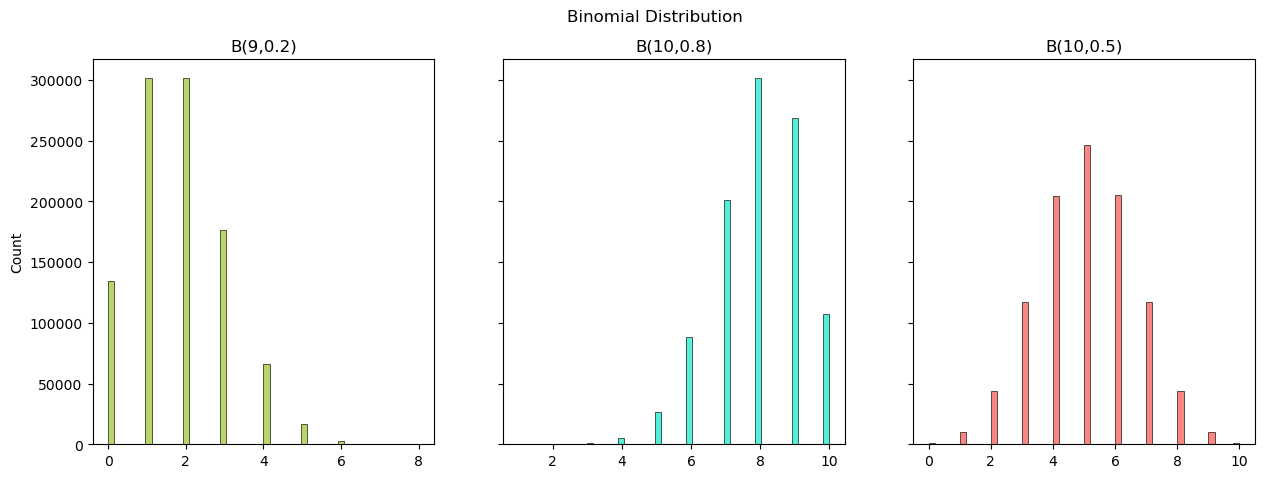

In [12]:
n1, n2, n3 = [9, 10, 10]
p1, p2, p3 = [0.2, 0.8,0.5]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Binomial Distribution')

sns.histplot(ax=axes[0], x=np.random.binomial(n = n1, p = p1, size = N),  bins=50, color = '#A1C935')
axes[0].set_title(f'B({n1},{p1})')

sns.histplot(ax=axes[1], x=np.random.binomial(n = n2, p = p2, size = N),  bins=50, color = '#1AEACD')
axes[1].set_title(f'B({n2},{p2})')

sns.histplot(ax=axes[2], x=np.random.binomial(n = n3, p = p3, size = N),  bins=50, color = '#F75D59')
axes[2].set_title(f'B({n3},{p3})');

To find the left probability of a point use the code below:

''
binom.cdf($X,P,n$)
''

To find the right probability of a point use the code below:

''
binom.sf($X,P,n$)
''

In [13]:
X = 2
n, p = [10, 0.2]
print(f'The left probability of *{X}* in the B({n},{p}) Distribution is: ', binom.cdf(X, p=p, n=n))
print(f'The Right probability of *{X}* in the B({n},{p}) Distribution is: ', binom.sf(X, p=p, n=n))

The left probability of *2* in the B(10,0.2) Distribution is:  0.6777995263999997
The Right probability of *2* in the B(10,0.2) Distribution is:  0.32220047360000026


To find the probability between two points $[X,Y]$ use the code below:

In [14]:
X = 2
Y = 4
n, p = [10, 0.2]
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the B({n},{p}) Distribution is: ', np.sum([binom.pmf(xs, p=p, n=n) for xs in xs]))

The probability between *[2, 4]* in the B(10,0.2) Distribution is:  0.5913968639999998


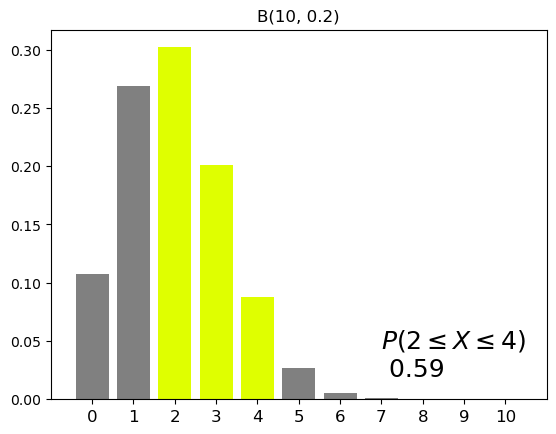

In [15]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,n+1))
plt.bar(x1, binom.pmf(x1, p=p, n=n), color ='gray')
plt.bar(x2, binom.pmf(x2, p=p, n=n), color ='#DFFF00')
plt.bar(x3, binom.pmf(x3, p=p, n=n), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'B({n}, {p})')
xs = np.arange(X, Y+1)
prob = np.sum([binom.pmf(xs, p=p, n=n) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [16]:
X = 2
Y = 4
n, p = [10, 0.2]
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the B({n},{p}) Distribution is: ', np.sum([binom.pmf(xs, p=p, n=n) for xs in xs]))

The probability between *(2, 4)* in the B(10,0.2) Distribution is:  0.20132659199999992


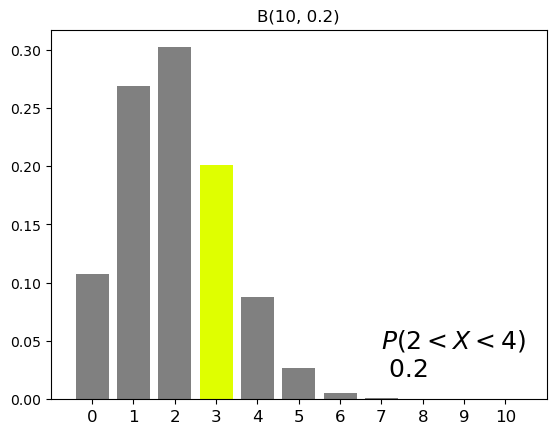

In [17]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,n+1))
plt.bar(x1, binom.pmf(x1, p=p, n=n), color ='gray')
plt.bar(x2, binom.pmf(x2, p=p, n=n), color ='#DFFF00')
plt.bar(x3, binom.pmf(x3, p=p, n=n), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'B({n}, {p})')
xs = np.arange(X+1, Y)
prob = np.sum([binom.pmf(xs, p=p, n=n) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [18]:
X = 2
Y = 4
n, p = [10, 0.2]
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the B({n},{p}) Distribution is: ', np.sum([binom.pmf(xs, p=p, n=n) for xs in xs]))

The probability between *[2, 4)* in the B(10,0.2) Distribution is:  0.50331648


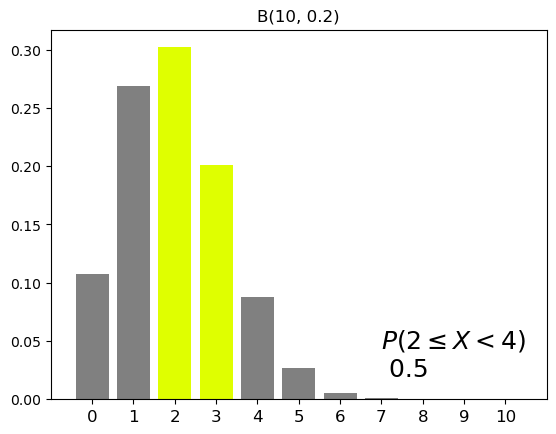

In [19]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,n+1))
plt.bar(x1, binom.pmf(x1, p=p, n=n), color ='gray')
plt.bar(x2, binom.pmf(x2, p=p, n=n), color ='#DFFF00')
plt.bar(x3, binom.pmf(x3, p=p, n=n), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'B({n}, {p})')
xs = np.arange(X, Y)
prob = np.sum([binom.pmf(xs, p=p, n=n) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [20]:
X = 2
Y = 4
n, p = [10, 0.2]
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the B({n},{p}) Distribution is: ', np.sum([binom.pmf(xs, p=p, n=n) for xs in xs]))

The probability between *(2, 4]* in the B(10,0.2) Distribution is:  0.2894069759999998


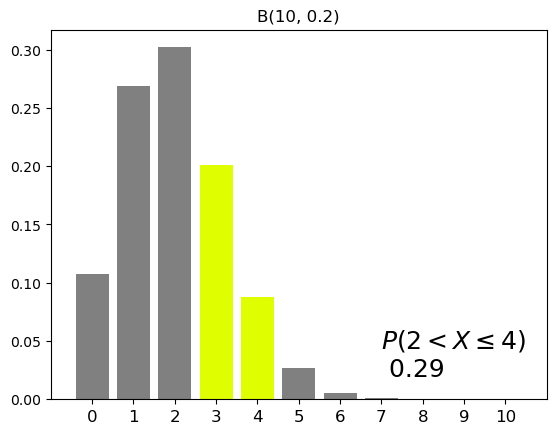

In [21]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,n+1))
plt.bar(x1, binom.pmf(x1, p=p, n=n), color ='gray')
plt.bar(x2, binom.pmf(x2, p=p, n=n), color ='#DFFF00')
plt.bar(x3, binom.pmf(x3, p=p, n=n), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'B({n}, {p})')
xs = np.arange(X+1, Y+1)
prob = np.sum([binom.pmf(xs, p=p, n=n) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
binom.pmf($X,P,n$)
''

In [22]:
X = 2
n, p = [10, 0.2]
print(f'The probability of *X={X}* in the B({n},{p}) Distribution is: ', binom.pmf(X, p=p, n=n))

The probability of *X=2* in the B(10,0.2) Distribution is:  0.30198988800000004


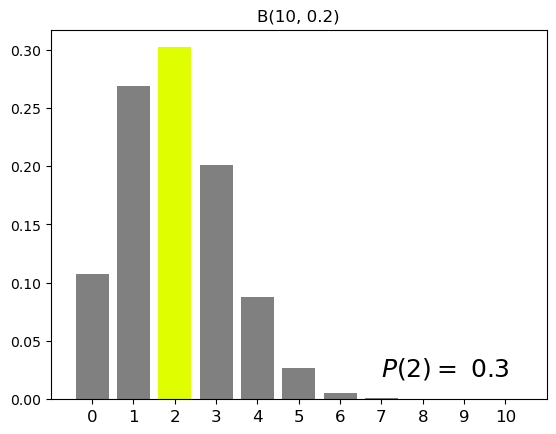

In [23]:
x1 = list(np.arange(0,X))
x2 = X
x3 = list(np.arange(X+1,n+1))
plt.bar(x1, binom.pmf(x1, p=p, n=n), color ='gray')
plt.bar(x2, binom.pmf(x2, p=p, n=n), color ='#DFFF00')
plt.bar(x3, binom.pmf(x3, p=p, n=n), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'B({n}, {p})')
prob = np.sum([binom.pmf(x2, p=p, n=n)])
plt.text(7, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);

If $X_1, X_2, ..., X_n \sim Ber(P) \quad$ then $\quad Y =  \sum_{i=1}^n X_i  \sim B(n,P)$

<a name='Negative_Binomial_Distribution'></a>

## **2.3. Negative Binomial (Pascal) Distribution:**

Suppose now that $n$ independent trials, each of which results in a “success” with probability $p$ and in a “failure” with probability $1 − p$, are to be performed. If $X$ represents the number of failures before rth success, then $X$ is said to be a negative binomial random variable with parameters $(r, p)$.

$P(X=i) = \binom{r+i-1}{r-1} p^r (1-p)^{i} \quad \quad i = 0,1,2,...$

$\\ $

$E(X) = \frac{r(1-p)}{p}$

$Var(X) = \frac{r(1-p)}{p^2}$

$Skewness(X) = \frac{2-p}{\sqrt{r(1-p)}}$

$Kurtosis(X) = \frac{p^2-6p+6}{r(1-p)}$

$\\ $

Moment-generating function:

$M_{x}(t) = p^r [1-(1-p)e^t]^{-r}$

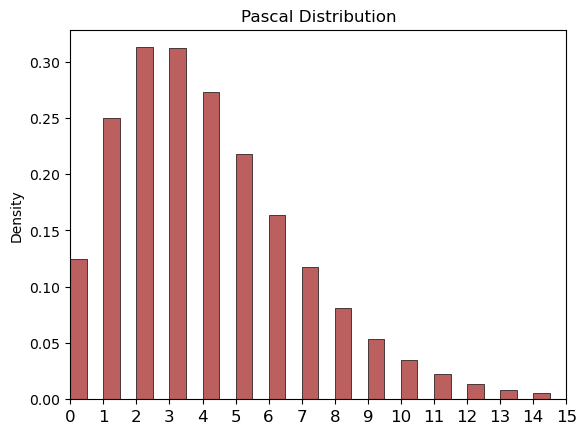

In [24]:
np.random.seed(1)
N = 10000000
n = 15
r, p = [4, 0.5]

pas_data = nbinom.rvs(n = r, p = p, size = N)

sns.histplot(pas_data, color='brown', stat='density', bins=68)

plt.xlim(0,n)
plt.xticks(list(range(0,n+1)), fontsize=12, ha='center')
plt.title('Pascal Distribution');

In [25]:
r, p = [4, 0.5]
print(f'The mean of the NB({r},{p}) Distribution is: ', np.round(nbinom.mean(p = p, n = r), 4))
print(f'The median of the NB({r},{p}) Distribution is: ', np.round(nbinom.median(p = p, n = r), 4))
print(f'The variance of the NB({r},{p}) Distribution is: ', np.round(nbinom.var(p = p, n = r), 4))
print(f'The standard deviation of the NB({r},{p}) Distribution is: ', np.round(nbinom.std(p = p, n = r), 4))
print(f'The skewness of the NB({r},{p}) Distribution is: ', np.round(nbinom.stats(p = p, n = r, moments='mvsk')[2], 4))
print(f'The kurtosis of the NB({r},{p}) Distribution is: ', np.round(nbinom.stats(p = p, n = r, moments='mvsk')[3], 4))

The mean of the NB(4,0.5) Distribution is:  4.0
The median of the NB(4,0.5) Distribution is:  3.0
The variance of the NB(4,0.5) Distribution is:  8.0
The standard deviation of the NB(4,0.5) Distribution is:  2.8284
The skewness of the NB(4,0.5) Distribution is:  1.0607
The kurtosis of the NB(4,0.5) Distribution is:  1.625


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

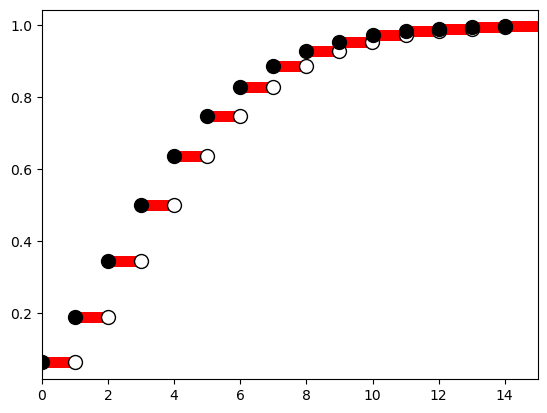

In [26]:
x = np.arange(0, n, 0.001)
x1 = np.arange(0, n)
x2 = np.arange(0, n-1) + 0.999

plt.scatter(x, nbinom.cdf(x, p=p, n=r), color = 'r')
plt.scatter(x2, nbinom.cdf(x2, p=p, n=r), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, nbinom.cdf(x1, p=p, n=r), color = 'black', edgecolor='black', s=100)
plt.xlim(0,n);

The binomial distribution histogram depends on the $n$ and $p$.

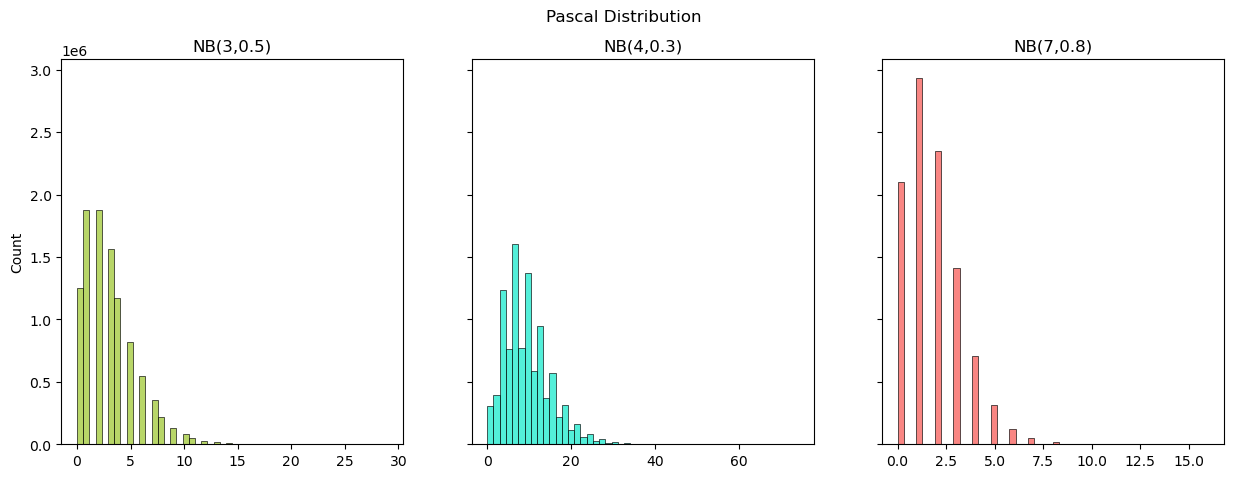

In [27]:
r1, r2, r3 = [3, 4, 7]
p1, p2, p3 = [0.5, 0.3, 0.8]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Pascal Distribution')

sns.histplot(ax=axes[0], x=nbinom.rvs(n = r1, p = p1, size = N),  bins=50, color = '#A1C935')
axes[0].set_title(f'NB({r1},{p1})')

sns.histplot(ax=axes[1], x=nbinom.rvs(n = r2, p = p2, size = N),  bins=50, color = '#1AEACD')
axes[1].set_title(f'NB({r2},{p2})')

sns.histplot(ax=axes[2], x=nbinom.rvs(n = r3, p = p3, size = N),  bins=50, color = '#F75D59')
axes[2].set_title(f'NB({r3},{p3})');

To find the left probability of a point use the code below:

''
nbinom.cdf($X,P,r$)
''

To find the right probability of a point use the code below:

''
nbinom.sf($X,P,r$)
''

In [28]:
X = 4
r, p = [4, 0.6]
print(f'The left probability of *{X}* in the NB({r},{p}) Distribution is: ', nbinom.cdf(X, p=p, n=r))
print(f'The Right probability of *{X}* in the NB({r},{p}) Distribution is: ', nbinom.sf(X, p=p, n=r))

The left probability of *4* in the NB(4,0.6) Distribution is:  0.8263295999999999
The Right probability of *4* in the NB(4,0.6) Distribution is:  0.1736704000000001


To find the probability between two points $[X,Y]$ use the code below:

In [29]:
X = 2
Y = 5
r, p = [4, 0.6]
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the NB({r},{p}) Distribution is: ', np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs]))

The probability between *[2, 5]* in the NB(4,0.6) Distribution is:  0.5636874239999999


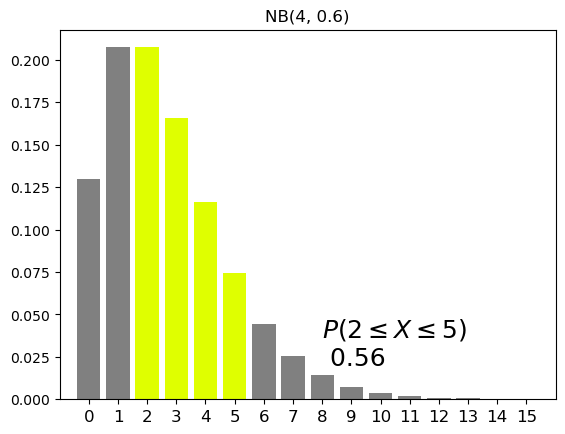

In [30]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,n+1))
plt.bar(x1, nbinom.pmf(x1, p=p, n=r), color ='gray')
plt.bar(x2, nbinom.pmf(x2, p=p, n=r), color ='#DFFF00')
plt.bar(x3, nbinom.pmf(x3, p=p, n=r), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'NB({r}, {p})')
xs = np.arange(X, Y+1)
prob = np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs])
plt.text(8, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [31]:
X = 2
Y = 5
r, p = [4, 0.6]
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the NB({r},{p}) Distribution is: ', np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs]))

The probability between *(2, 5)* in the NB(4,0.6) Distribution is:  0.2820096000000001


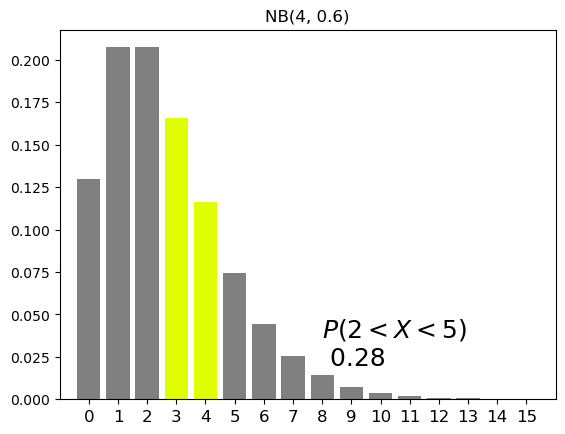

In [32]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,n+1))
plt.bar(x1, nbinom.pmf(x1, p=p, n=r), color ='gray')
plt.bar(x2, nbinom.pmf(x2, p=p, n=r), color ='#DFFF00')
plt.bar(x3, nbinom.pmf(x3, p=p, n=r), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'NB({r}, {p})')
xs = np.arange(X+1, Y)
prob = np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs])
plt.text(8, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [33]:
X = 2
Y = 5
r, p = [4, 0.6]
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the NB({r},{p}) Distribution is: ', np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs]))

The probability between *[2, 5)* in the NB(4,0.6) Distribution is:  0.4893695999999999


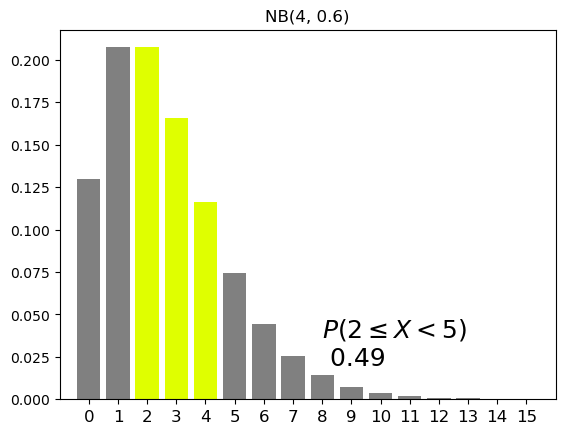

In [34]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,n+1))
plt.bar(x1, nbinom.pmf(x1, p=p, n=r), color ='gray')
plt.bar(x2, nbinom.pmf(x2, p=p, n=r), color ='#DFFF00')
plt.bar(x3, nbinom.pmf(x3, p=p, n=r), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'NB({r}, {p})')
xs = np.arange(X, Y)
prob = np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs])
plt.text(8, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [35]:
X = 2
Y = 5
r, p = [4, 0.6]
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the NB({r},{p}) Distribution is: ', np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs]))

The probability between *(2, 5]* in the NB(4,0.6) Distribution is:  0.3563274240000001


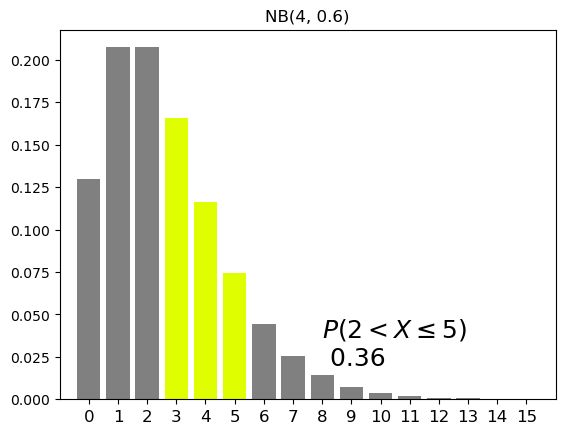

In [36]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,n+1))
plt.bar(x1, nbinom.pmf(x1, p=p, n=r), color ='gray')
plt.bar(x2, nbinom.pmf(x2, p=p, n=r), color ='#DFFF00')
plt.bar(x3, nbinom.pmf(x3, p=p, n=r), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'NB({r}, {p})')
xs = np.arange(X+1, Y+1)
prob = np.sum([nbinom.pmf(xs, p=p, n=r) for xs in xs])
plt.text(8, 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
nbinom.pmf($X,P,r$)
''

In [37]:
X = 2
r, p = [4, 0.6]
print(f'The probability of *X={X}* in the NB({r},{p}) Distribution is: ', nbinom.pmf(X, p=p, n=r))

The probability of *X=2* in the NB(4,0.6) Distribution is:  0.2073599999999998


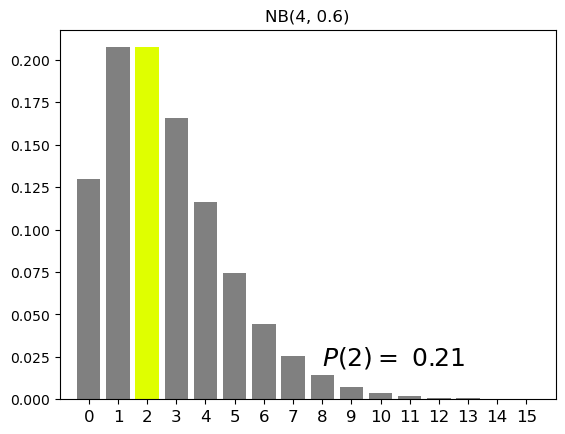

In [38]:
x1 = list(np.arange(0,X))
x2 = X
x3 = list(np.arange(X+1,n+1))
plt.bar(x1, nbinom.pmf(x1, p=p, n=r), color ='gray')
plt.bar(x2, nbinom.pmf(x2, p=p, n=r), color ='#DFFF00')
plt.bar(x3, nbinom.pmf(x3, p=p, n=r), color ='gray')
plt.xlim(-1,n+1)
plt.xticks(np.arange(0,n+1), fontsize=12, ha='center')
plt.title(f'NB({r}, {p})')
prob = np.sum([nbinom.pmf(x2, p=p, n=r)])
plt.text(8, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);

<a name='Geometric_Distribution'></a>

## **2.4. Geometric Distribution:**

The geometric distribution is a special case of the negative binomial distribution.

Suppose now that $n$ independent trials, each of which results in a “success” with probability $p$ and in a “failure” with probability $1 − p$, are to be performed. If $X$ represents the number of experiemnts to the occurrence of the fisrt success, then $X$ is said to be a geometric random variable with parameter $(p)$.

$P(X=i) = (1-p)^{i-1}\ p \quad \quad i = 1,2,...,\infty$

$\\ $

$E(X) = \frac{1}{p}$

$Var(X) = \frac{1-p}{p^2} = \frac{q}{P^2}$

$Median(X) = \lceil \frac{-1}{log_2 (1-p)} \rceil$

$Skewness(X) = \frac{2\ -\ p}{\sqrt{1\ -\ p}}$

$Kurtosis(X) = 6+ \frac{p^2}{1\ -\ p}$

$\\ $

Moment-generating function:

$M_{x}(t) = \frac{p\ e^t}{1\ -\ q\ e^t}$

$\\ $

$CDF = F(X=x) = 1-q^x$

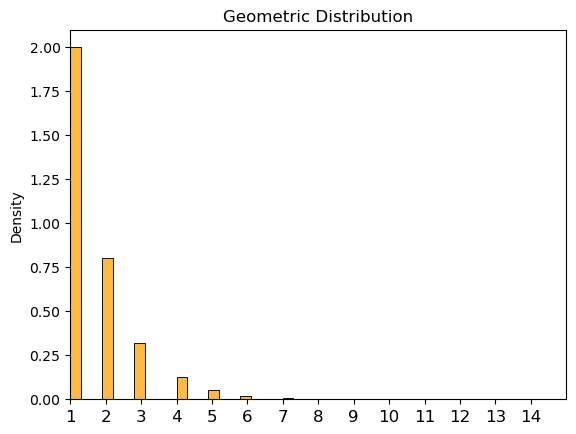

In [39]:
np.random.seed(1)
N = 1000000
p = 0.6

geo_data = np.random.geometric(p = p, size = N)

sns.histplot(geo_data, color='orange', stat='density', bins=50)

plt.xlim(1,15)
plt.xticks(list(range(1,15)), fontsize=12, ha='center')
plt.title('Geometric Distribution');

In [40]:
p = 0.6
print(f'The mean of the G({p}) Distribution is: ', np.round(geom.mean(p = p), 4))
print(f'The median of the G({p}) Distribution is: ', np.round(geom.median(p = p), 4))
print(f'The variance of the G({p}) Distribution is: ', np.round(geom.var(p = p), 4))
print(f'The standard deviation of the G({p}) Distribution is: ', np.round(geom.std(p = p), 4))
print(f'The skewness of the G({p}) Distribution is: ', np.round(geom.stats(p = p, moments='mvsk')[2], 4))
print(f'The kurtosis of the G({p}) Distribution is: ', np.round(geom.stats(p = p, moments='mvsk')[3], 4))

The mean of the G(0.6) Distribution is:  1.6667
The median of the G(0.6) Distribution is:  1.0
The variance of the G(0.6) Distribution is:  1.1111
The standard deviation of the G(0.6) Distribution is:  1.0541
The skewness of the G(0.6) Distribution is:  2.2136
The kurtosis of the G(0.6) Distribution is:  6.9


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

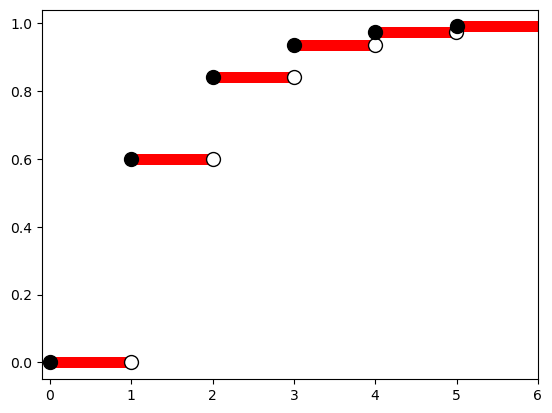

In [41]:
n = 6
x = np.arange(0, n, 0.001)
x1 = np.arange(0, n)
x2 = np.arange(0, n-1) + 0.999

plt.scatter(x, geom.cdf(x, p=p), color = 'r')
plt.scatter(x2, geom.cdf(x2, p=p), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, geom.cdf(x1, p=p), color = 'black', edgecolor='black', s=100)
plt.xlim(-0.1,n);

To find the left probability of a point use the code below:

''
geom.cdf($X,P$)
''

To find the right probability of a point use the code below:

''
geom.sf($X,P$)
''

In [42]:
X = 3
p = 0.6
print(f'The left probability of *{X}* in the G({p}) Distribution is: ', geom.cdf(X, p=p))
print(f'The Right probability of *{X}* in the G({p}) Distribution is: ', geom.sf(X, p=p))

The left probability of *3* in the G(0.6) Distribution is:  0.9359999999999999
The Right probability of *3* in the G(0.6) Distribution is:  0.06400000000000002


To find the probability between two points $[X,Y]$ use the code below:

In [43]:
X = 2
Y = 4
p = 0.6
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the G({p}) Distribution is: ', np.sum([geom.pmf(xs, p=p) for xs in xs]))

The probability between *[2, 4]* in the G(0.6) Distribution is:  0.3744


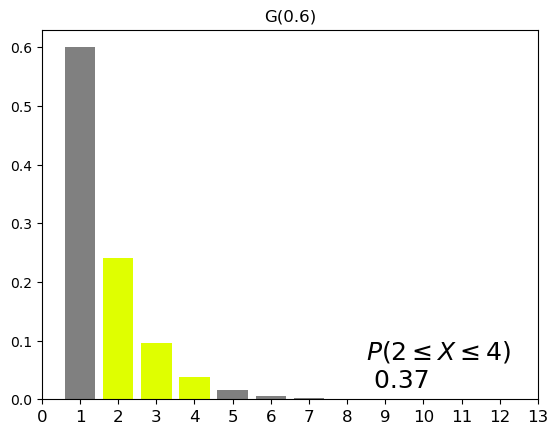

In [44]:
x1 = list(np.arange(1,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, geom.pmf(x1, p=p), color ='gray')
plt.bar(x2, geom.pmf(x2, p=p), color ='#DFFF00')
plt.bar(x3, geom.pmf(x3, p=p), color ='gray')
plt.xlim(0,10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'G({p})')
xs = np.arange(X, Y+1)
prob = np.sum([geom.pmf(xs, p=p) for xs in xs])
plt.text(8.5, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [45]:
X = 2
Y = 4
p = 0.6
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the Normal Standard Distribution is: ', np.sum([geom.pmf(xs, p=p) for xs in xs]))

The probability between *(2, 4)* in the Normal Standard Distribution is:  0.09600000000000002


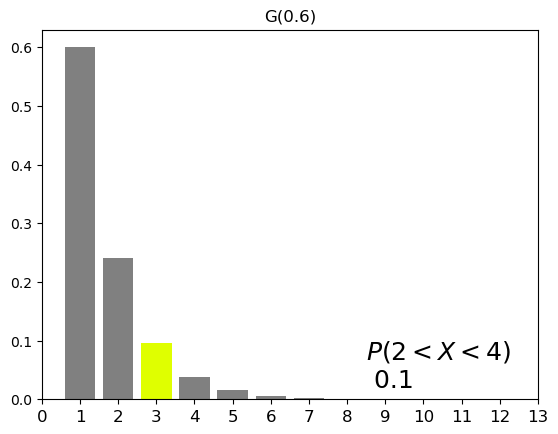

In [46]:
x1 = list(np.arange(1,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,Y+10))
plt.bar(x1, geom.pmf(x1, p=p), color ='gray')
plt.bar(x2, geom.pmf(x2, p=p), color ='#DFFF00')
plt.bar(x3, geom.pmf(x3, p=p), color ='gray')
plt.xlim(0,10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'G({p})')
xs = np.arange(X+1, Y)
prob = np.sum([geom.pmf(xs, p=p) for xs in xs])
plt.text(8.5, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [47]:
X = 2
Y = 4
p = 0.6
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the G({p}) Distribution is: ', np.sum([geom.pmf(xs, p=p) for xs in xs]))

The probability between *[2, 4)* in the G(0.6) Distribution is:  0.336


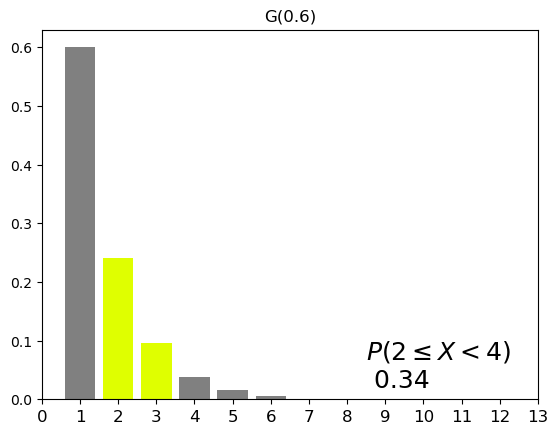

In [48]:
x1 = list(np.arange(1,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,n+1))
plt.bar(x1, geom.pmf(x1, p=p), color ='gray')
plt.bar(x2, geom.pmf(x2, p=p), color ='#DFFF00')
plt.bar(x3, geom.pmf(x3, p=p), color ='gray')
plt.xlim(0,10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'G({p})')
xs = np.arange(X, Y)
prob = np.sum([geom.pmf(xs, p=p) for xs in xs])
plt.text(8.5, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [49]:
X = 2
Y = 4
p = 0.6
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the G({p}) Distribution is: ', np.sum([geom.pmf(xs, p=p) for xs in xs]))

The probability between *(2, 4]* in the G(0.6) Distribution is:  0.13440000000000002


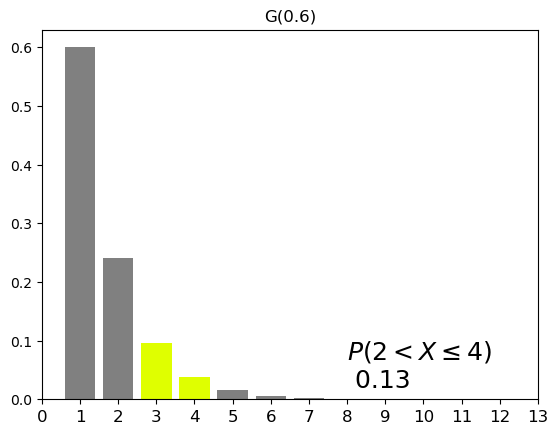

In [50]:
x1 = list(np.arange(1,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, geom.pmf(x1, p=p), color ='gray')
plt.bar(x2, geom.pmf(x2, p=p), color ='#DFFF00')
plt.bar(x3, geom.pmf(x3, p=p), color ='gray')
plt.xlim(0,10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'G({p})')
xs = np.arange(X+1, Y+1)
prob = np.sum([geom.pmf(xs, p=p) for xs in xs])
plt.text(8., 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
geom.pmf($X,P$)
''

In [51]:
X = 2
p = 0.6
print(f'The probability of *X={X}* in the G({p}) Distribution is: ', geom.pmf(X, p=p))

The probability of *X=2* in the G(0.6) Distribution is:  0.24


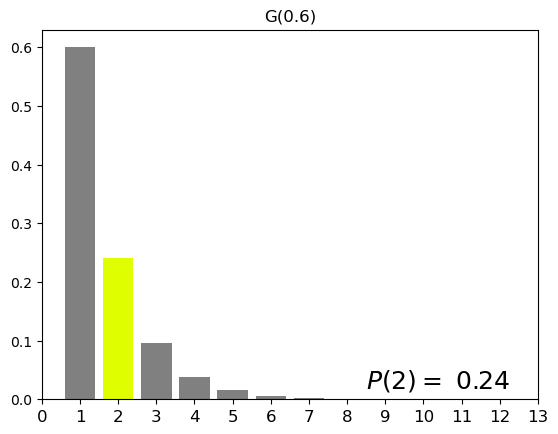

In [52]:
x1 = list(np.arange(1,X))
x2 = X
x3 = list(np.arange(X+1,Y+10))
plt.bar(x1, geom.pmf(x1, p=p), color ='gray')
plt.bar(x2, geom.pmf(x2, p=p), color ='#DFFF00')
plt.bar(x3, geom.pmf(x3, p=p), color ='gray')
plt.xlim(0,10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'G({p})')
prob = np.sum([geom.pmf(x2, p=p)])
plt.text(8.5, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);

$P(X>s+t\ |\ X>s) = P(X>t)$

<a name='Poisson_Distribution'></a>

## **2.5. Poisson Distribution:**

$P(X=x) = \frac{e^{-\lambda}\lambda^x}{x!} \quad \quad x = 0,1,...,\infty$

$\\ $

$E(X) = \lambda$

$Var(X) = \lambda$

$Skewness(X) = \lambda^{-\frac{1}{2}}$

$Kurtosis(X) = \lambda^{-1}$

$Mode(X) = \begin{cases}\lambda,\lambda-1 & \lambda \in integer \\ [\lambda] & \lambda \not\in integer \end{cases}$

$\\ $

Moment-generating function:

$M_{x}(t) = e^{\lambda(e^t-1)}$

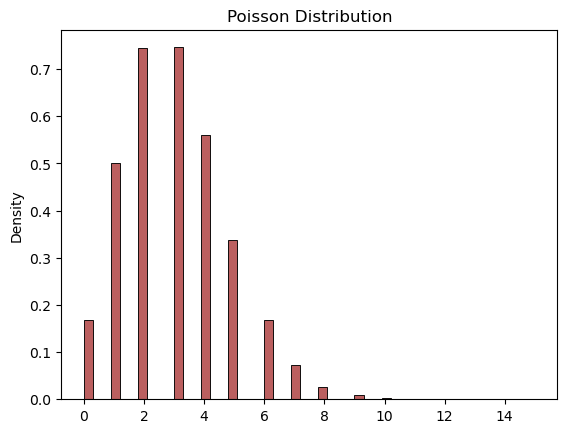

In [53]:
np.random.seed(1)
N = 1000000
lam = 3

poi_data = np.random.poisson(lam = lam, size = N)

sns.histplot(poi_data, color='Brown', stat='density', bins=50)

plt.title('Poisson Distribution');

In [54]:
def mode_poisson(lam):
  if math.modf(lam)[0] == 0.0:
    return [lam, lam-1]
  else:
    return np.floor(lam)

In [55]:
lam = 3
print(f'The mean of the P({lam}) Distribution is: ', np.round(poisson.mean(lam), 4))
print(f'The median of the P({lam}) Distribution is: ', np.round(poisson.median(lam), 4))
print(f'The variance of the P({lam}) Distribution is: ', np.round(poisson.var(lam), 4))
print(f'The standard deviation of the P({lam}) Distribution is: ', np.round(poisson.std(lam), 4))
print(f'The mode of the P({lam}) Distribution is: ', np.round(mode_poisson(lam), 4))
print(f'The skewness of the P({lam}) Distribution is: ', np.round(poisson.stats(lam, moments='mvsk')[2], 4))
print(f'The kurtosis of the P({lam}) Distribution is: ', np.round(poisson.stats(lam, moments='mvsk')[3], 4))

The mean of the P(3) Distribution is:  3.0
The median of the P(3) Distribution is:  3.0
The variance of the P(3) Distribution is:  3.0
The standard deviation of the P(3) Distribution is:  1.7321
The mode of the P(3) Distribution is:  [3 2]
The skewness of the P(3) Distribution is:  0.5774
The kurtosis of the P(3) Distribution is:  0.3333


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

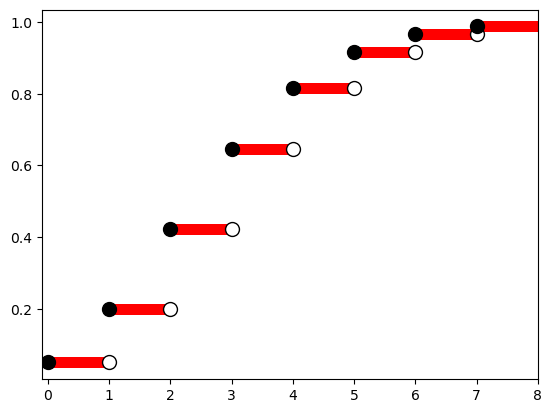

In [56]:
n = 8
x = np.arange(0, n, 0.001)
x1 = np.arange(0, n)
x2 = np.arange(0, n-1) + 0.999

plt.scatter(x, poisson.cdf(x, lam), color = 'r')
plt.scatter(x2, poisson.cdf(x2, lam), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, poisson.cdf(x1, lam), color = 'black', edgecolor='black', s=100)
plt.xlim(-0.1,n);

The poisson distribution histogram depends on the $\lambda$.

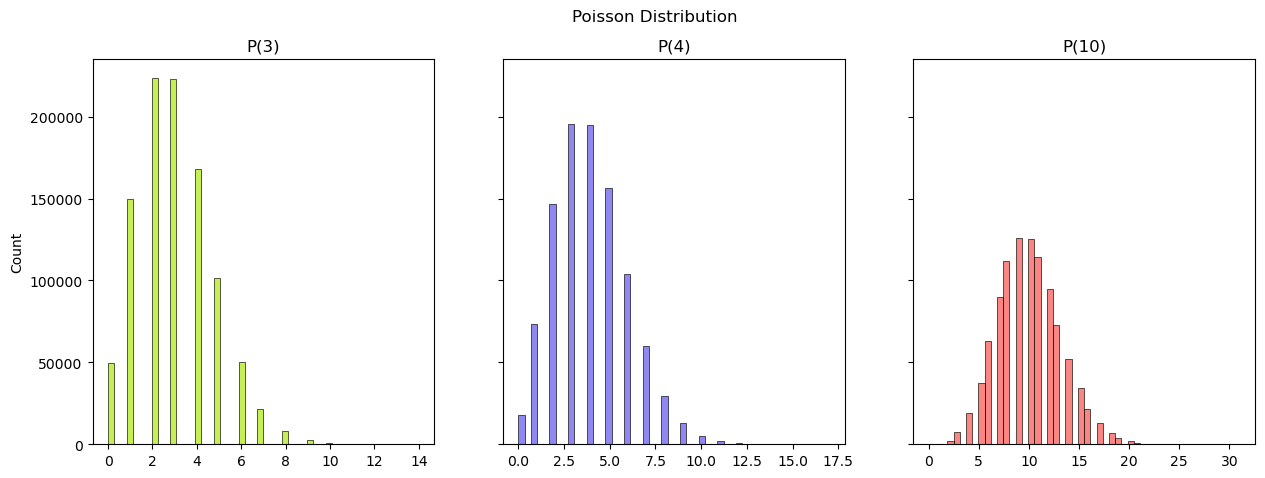

In [57]:
lam1, lam2, lam3 = [3, 4, 10]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Poisson Distribution')

sns.histplot(ax=axes[0], x=np.random.poisson(lam = lam1, size = N),  bins=50, color = '#B4EA1A')
axes[0].set_title(f'P({lam1})')

sns.histplot(ax=axes[1], x=np.random.poisson(lam = lam2, size = N),  bins=50, color = '#6960EC')
axes[1].set_title(f'P({lam2})')

sns.histplot(ax=axes[2], x=np.random.poisson(lam = lam3, size = N),  bins=50, color = '#F75D59')
axes[2].set_title(f'P({lam3})');

To find the left probability of a point use the code below:

''
poisson.cdf($\lambda$)
''

To find the right probability of a point use the code below:

''
poisson.sf($\lambda$)
''

In [58]:
X = 3
lam = 3
print(f'The left probability of *{X}* in the P({lam}) Distribution is: ', poisson.cdf(X, lam))
print(f'The Right probability of *{X}* in the P({lam}) Distribution is: ', poisson.sf(X, lam))

The left probability of *3* in the P(3) Distribution is:  0.6472318887822313
The Right probability of *3* in the P(3) Distribution is:  0.3527681112177687


To find the probability between two points $[X,Y]$ use the code below:

In [59]:
X = 2
Y = 5
lam = 3
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the P({lam}) Distribution is: ', np.sum([poisson.pmf(xs, lam) for xs in xs]))

The probability between *[2, 5]* in the P(3) Distribution is:  0.716933784497241


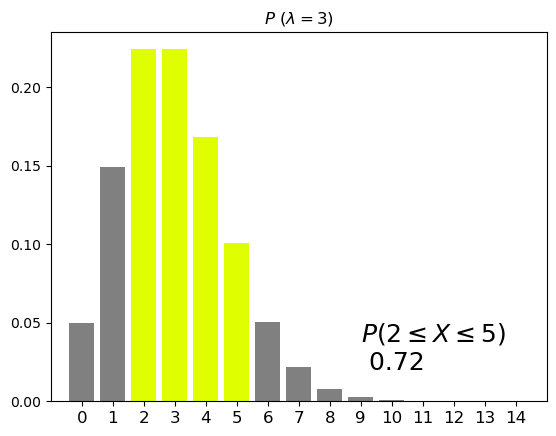

In [60]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, poisson.pmf(x1, lam), color ='gray')
plt.bar(x2, poisson.pmf(x2, lam), color ='#DFFF00')
plt.bar(x3, poisson.pmf(x3, lam), color ='gray')
plt.xlim(-1,Y+10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'$P\ (\lambda = {lam})$')
xs = np.arange(X, Y+1)
prob = np.sum([poisson.pmf(xs, lam) for xs in xs])
plt.text(9, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [61]:
X = 2
Y = 5
lam = 3
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the P({lam1}) Distribution is: ', np.sum([poisson.pmf(xs, lam) for xs in xs]))

The probability between *(2, 5)* in the P(3) Distribution is:  0.3920731633969286


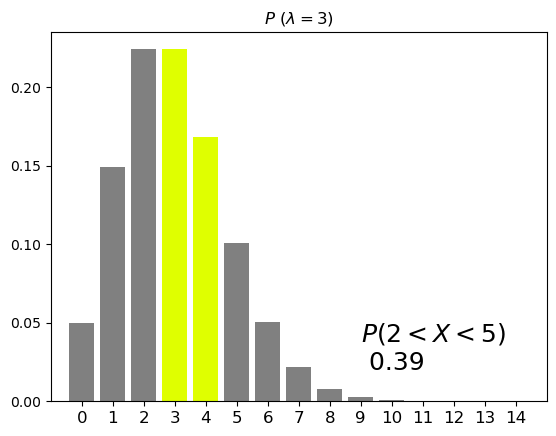

In [62]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,Y+10))
plt.bar(x1, poisson.pmf(x1, lam), color ='gray')
plt.bar(x2, poisson.pmf(x2, lam), color ='#DFFF00')
plt.bar(x3, poisson.pmf(x3, lam), color ='gray')
plt.xlim(-1,Y+10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'$P\ (\lambda = {lam})$')
xs = np.arange(X+1, Y)
prob = np.sum([poisson.pmf(xs, lam) for xs in xs])
plt.text(9, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [63]:
X = 2
Y = 5
lam = 3
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the P({lam1}) Distribution is: ', np.sum([poisson.pmf(xs, lam) for xs in xs]))

The probability between *[2, 5)* in the P(3) Distribution is:  0.6161149710523164


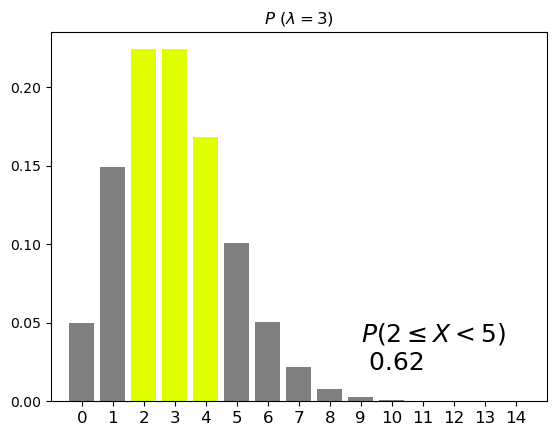

In [64]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,Y+10))
plt.bar(x1, poisson.pmf(x1, lam), color ='gray')
plt.bar(x2, poisson.pmf(x2, lam), color ='#DFFF00')
plt.bar(x3, poisson.pmf(x3, lam), color ='gray')
plt.xlim(-1,Y+10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'$P\ (\lambda = {lam})$')
xs = np.arange(X, Y)
prob = np.sum([poisson.pmf(xs, lam) for xs in xs])
plt.text(9, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [65]:
X = 2
Y = 5
lam = 3
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the P({lam1}) Distribution is: ', np.sum([poisson.pmf(xs, lam) for xs in xs]))

The probability between *(2, 5]* in the P(3) Distribution is:  0.49289197684185315


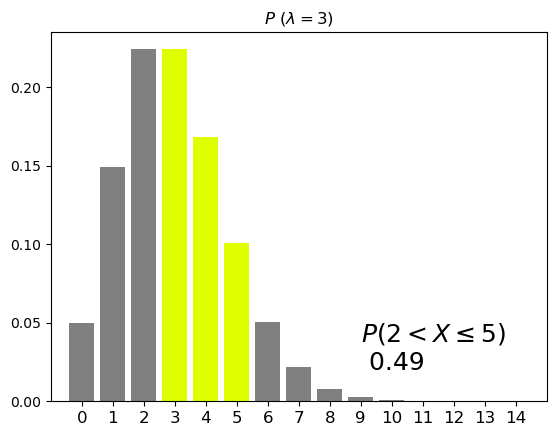

In [66]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, poisson.pmf(x1, lam), color ='gray')
plt.bar(x2, poisson.pmf(x2, lam), color ='#DFFF00')
plt.bar(x3, poisson.pmf(x3, lam), color ='gray')
plt.xlim(-1,Y+10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'$P\ (\lambda = {lam})$')
xs = np.arange(X+1, Y+1)
prob = np.sum([poisson.pmf(xs, lam) for xs in xs])
plt.text(9, 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
poisson.pmf($X, \lambda$)
''

In [67]:
X = 2
lam = 3
print(f'The probability of *X={X}* in the P({lam}) Distribution is: ', poisson.pmf(X, lam))

The probability of *X=2* in the P(3) Distribution is:  0.22404180765538775


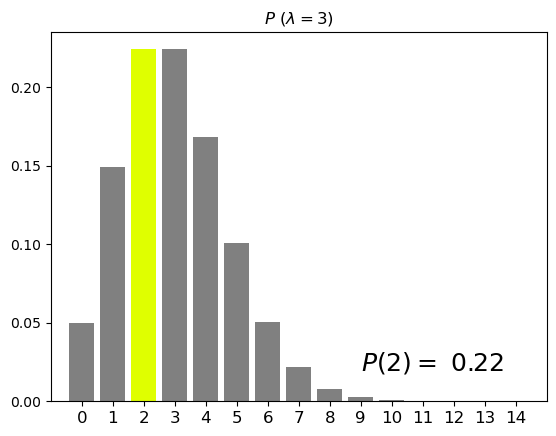

In [68]:
x1 = list(np.arange(0,X))
x2 = X
x3 = list(np.arange(X+1,Y+10))
plt.bar(x1, poisson.pmf(x1, lam), color ='gray')
plt.bar(x2, poisson.pmf(x2, lam), color ='#DFFF00')
plt.bar(x3, poisson.pmf(x3, lam), color ='gray')
plt.xlim(-1,Y+10)
plt.xticks(np.arange(0,Y+10), fontsize=12, ha='center')
plt.title(f'$P\ (\lambda = {lam})$')
prob = poisson.pmf(x2, lam)
plt.text(9, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);

<a name='Discrete_Uniform_Distribution'></a>

## **2.6. Discrete Uniform Distribution:**

$P(X=x) = \frac{1}{n} \quad \quad x = a,a+1,...,b-1,b$

$\ \qquad \qquad \qquad \qquad n = b − a + 1$

$\\ $

$E(X) = \frac{a+b}{2}$

$Var(X) = \frac{n^2-1}{12}$

$Median(X) = \frac{a+b}{2}$

$Skewness(X) = 0$

$Kurtosis(X) = -\frac{6(n^2+1)}{5(n^2-1)}$

$\\ $

Moment-generating function:

$M_{x}(t) = \frac{e^{at}-e^{(b+1)t}}{n(1-e^t)}$

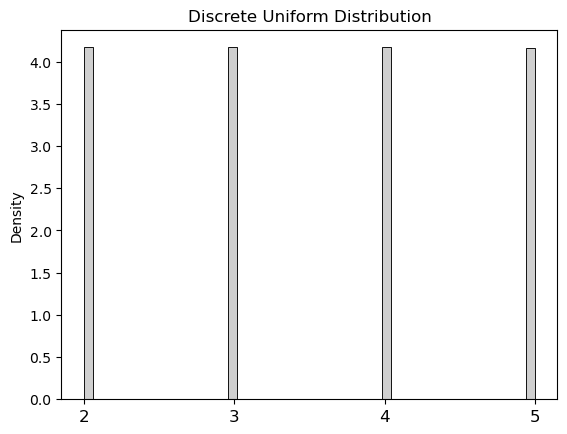

In [69]:
np.random.seed(1)
N = 1000000
a, b = [2,5]

ud_data = np.random.randint(low = a, high = b+1, size = N)

sns.histplot(ud_data, color='Silver', stat='density', bins=50)

plt.xticks(list(range(a,b+1)), fontsize=12, ha='center')
plt.title('Discrete Uniform Distribution');

In [70]:
a, b = [2,5]
r = np.arange(a, b+1)
print(f'The mean of the U{r} Distribution is: ', np.round(randint.mean(a, b+1), 4))
print(f'The median of the U{r} Distribution is: ', np.round(randint.median(a, b+1), 4))
print(f'The variance of the U{r} Distribution is: ', np.round(randint.var(a, b+1), 4))
print(f'The standard deviation of the U{r} Distribution is: ', np.round(randint.std(a, b+1), 4))
print(f'The skewness of the U{r} Distribution is: ', np.round(randint.stats(a, b+1, moments='mvsk')[2], 4))
print(f'The kurtosis of the U{r} Distribution is: ', np.round(randint.stats(a, b+1, moments='mvsk')[3], 4))

The mean of the U[2 3 4 5] Distribution is:  3.5
The median of the U[2 3 4 5] Distribution is:  3.0
The variance of the U[2 3 4 5] Distribution is:  1.25
The standard deviation of the U[2 3 4 5] Distribution is:  1.118
The skewness of the U[2 3 4 5] Distribution is:  0.0
The kurtosis of the U[2 3 4 5] Distribution is:  -1.36


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

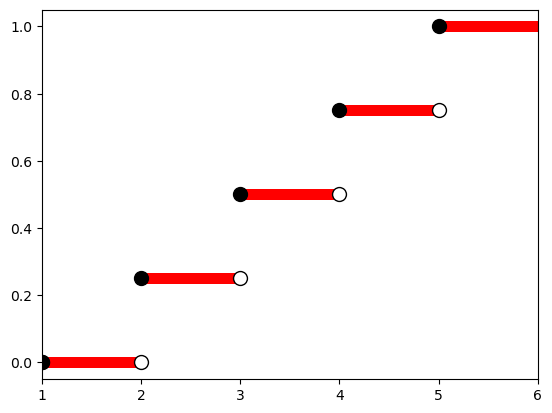

In [71]:
n = 6
x = np.arange(a-2, b+1, 0.001)
x1 = np.arange(a-2, b+1)
x2 = np.arange(a-2, b) + 0.999

plt.scatter(x, randint.cdf(x, a, b+1), color = 'r')
plt.scatter(x2, randint.cdf(x2, a, b+1), color = 'white', edgecolor='black', s=100)
plt.scatter(x1, randint.cdf(x1, a, b+1), color = 'black', edgecolor='black', s=100)
plt.xlim(1,n);

To find the left probability of a point use the code below:

''
randint.cdf($a, b$)
''

To find the right probability of a point use the code below:

''
randint.sf($a, b$)
''

In [72]:
X = 4
a, b = [2,5]
r = np.arange(a, b+1)
print(f'The left probability of *{X}* in the U{r} Distribution is: ', randint.cdf(X, a, b+1))
print(f'The Right probability of *{X}* in the U{r} Distribution is: ', randint.sf(X, a, b+1))

The left probability of *4* in the U[2 3 4 5] Distribution is:  0.75
The Right probability of *4* in the U[2 3 4 5] Distribution is:  0.25


To find the probability between two points $[X,Y]$ use the code below:

In [73]:
X = 3
Y = 5
a, b = [2,5]
r = list(np.arange(a, b+1))
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the U{r} Distribution is: ', np.sum([randint.pmf(xs, a, b+1) for xs in xs]))

The probability between *[3, 5]* in the U[2, 3, 4, 5] Distribution is:  0.75


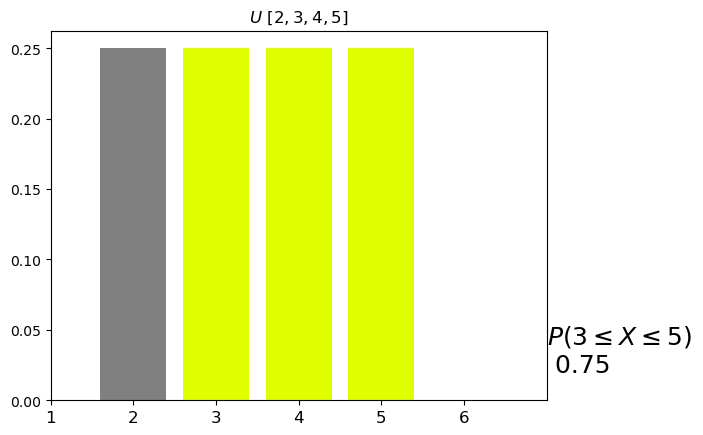

In [74]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, randint.pmf(x1, a, b+1), color ='gray')
plt.bar(x2, randint.pmf(x2, a, b+1), color ='#DFFF00')
plt.bar(x3, randint.pmf(x3, a, b+1), color ='gray')
plt.xlim(a-1,b+2)
plt.xticks(np.arange(a-1,b+2), fontsize=12, ha='center')
plt.title(f'$U\ {r}$')
xs = np.arange(X, Y+1)
prob = np.sum([randint.pmf(xs, a, b+1) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [75]:
X = 3
Y = 5
a, b = [2,5]
r = list(np.arange(a, b+1))
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the U{r} Distribution is: ', np.sum([randint.pmf(xs, a, b+1) for xs in xs]))

The probability between *(3, 5)* in the U[2, 3, 4, 5] Distribution is:  0.25


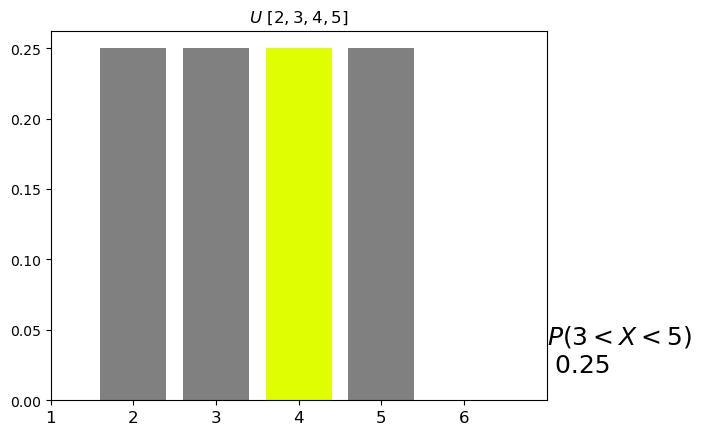

In [76]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,Y+10))
plt.bar(x1, randint.pmf(x1, a, b+1), color ='gray')
plt.bar(x2, randint.pmf(x2, a, b+1), color ='#DFFF00')
plt.bar(x3, randint.pmf(x3, a, b+1), color ='gray')
plt.xlim(a-1,b+2)
plt.xticks(np.arange(a-1,b+2), fontsize=12, ha='center')
plt.title(f'$U\ {r}$')
xs = np.arange(X+1, Y)
prob = np.sum([randint.pmf(xs, a, b+1) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [77]:
X = 3
Y = 5
a, b = [2,5]
r = list(np.arange(a, b+1))
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the U{r} Distribution is: ', np.sum([randint.pmf(xs, a, b+1) for xs in xs]))

The probability between *[3, 5)* in the U[2, 3, 4, 5] Distribution is:  0.5


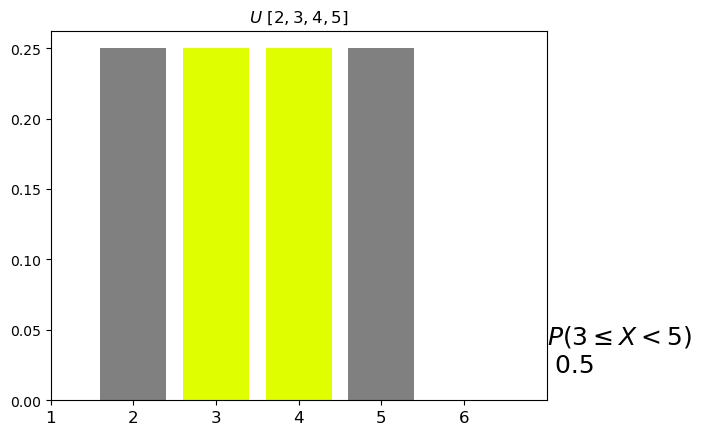

In [78]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,Y+10))
plt.bar(x1, randint.pmf(x1, a, b+1), color ='gray')
plt.bar(x2, randint.pmf(x2, a, b+1), color ='#DFFF00')
plt.bar(x3, randint.pmf(x3, a, b+1), color ='gray')
plt.xlim(a-1,b+2)
plt.xticks(np.arange(a-1,b+2), fontsize=12, ha='center')
plt.title(f'$U\ {r}$')
xs = np.arange(X, Y)
prob = np.sum([randint.pmf(xs, a, b+1) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [79]:
X = 3
Y = 5
a, b = [2,5]
r = list(np.arange(a, b+1))
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the U{r} Distribution is: ', np.sum([randint.pmf(xs, a, b+1) for xs in xs]))

The probability between *(3, 5]* in the U[2, 3, 4, 5] Distribution is:  0.5


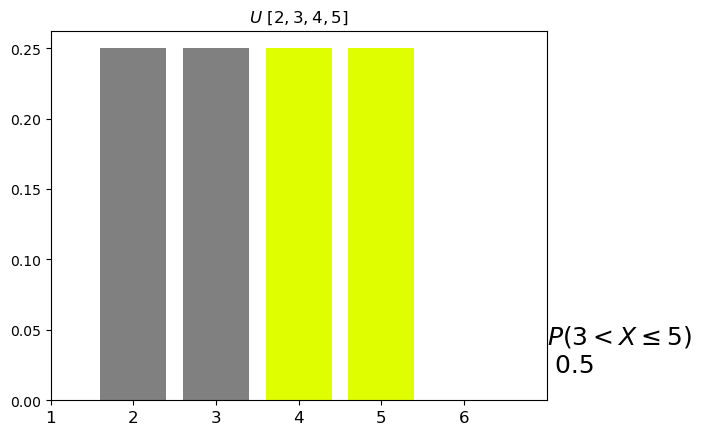

In [80]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,Y+10))
plt.bar(x1, randint.pmf(x1, a, b+1), color ='gray')
plt.bar(x2, randint.pmf(x2, a, b+1), color ='#DFFF00')
plt.bar(x3, randint.pmf(x3, a, b+1), color ='gray')
plt.xlim(a-1,b+2)
plt.xticks(np.arange(a-1,b+2), fontsize=12, ha='center')
plt.title(f'$U\ {r}$')
xs = np.arange(X+1, Y+1)
prob = np.sum([randint.pmf(xs, a, b+1) for xs in xs])
plt.text(7, 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
randint.pmf($X, a, b+1$)
''

In [81]:
X = 3
a, b = [2,5]
print(f'The probability of *X={X}* in the U{r} Distribution is: ', randint.pmf(X, a, b+1))

The probability of *X=3* in the U[2, 3, 4, 5] Distribution is:  0.25


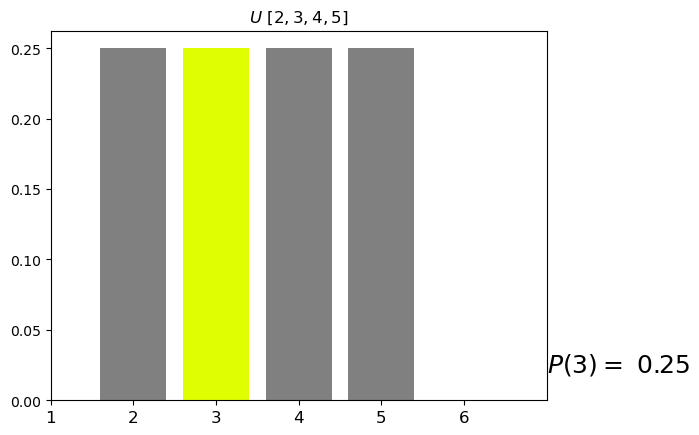

In [82]:
x1 = list(np.arange(0,X))
x2 = X
x3 = list(np.arange(X+1,Y+10))
plt.bar(x1, randint.pmf(x1, a, b+1), color ='gray')
plt.bar(x2, randint.pmf(x2, a, b+1), color ='#DFFF00')
plt.bar(x3, randint.pmf(x3, a, b+1), color ='gray')
plt.xlim(a-1,b+2)
plt.xticks(np.arange(a-1,b+2), fontsize=12, ha='center')
plt.title(f'$U\ {r}$')
prob = randint.pmf(x2, a, b+1)
plt.text(7, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);

<a name='Hypergeometric_Distribution'></a>

## **2.7. Hypergeometric Distribution:**

$P(X=i) = \frac{\binom{i}{m} \binom{N-m}{n-i}}{\binom{N}{n}} \quad \quad N = 0,1,2,...,\infty$

$\ \qquad \qquad \qquad \qquad \qquad \quad m = 0,1,2,...,N$

$\ \qquad \qquad \qquad \qquad \qquad \quad n = 0,1,2,...,N$

$\\ $

$E(X) = \frac{mn}{N}$

$Var(X) = n \frac{m}{N} (1-\frac{m}{N}) \frac{N-n}{N-1}$

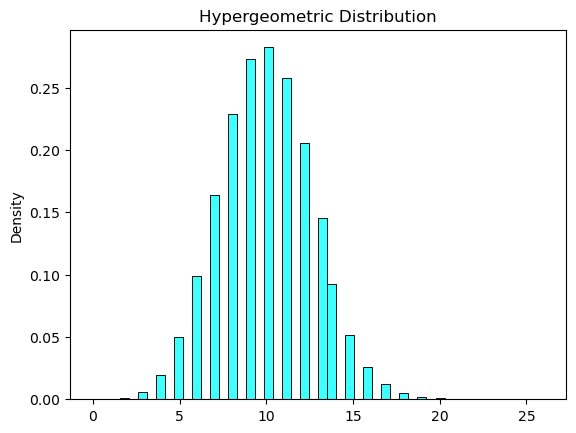

In [83]:
np.random.seed(1)
s = 1000000
m, N, n = [50, 500, 100]

hg_data = np.random.hypergeometric(ngood = m, nbad = N-m, nsample = n, size=s)

sns.histplot(hg_data, color='cyan', stat='density', bins=50)

plt.title('Hypergeometric Distribution');

In [84]:
m, N, n = [50, 500, 100]
print(f'The mean of the HG{N,m,n} Distribution is: ', np.round(hypergeom.mean(n = m, M = N, N = n), 4))
print(f'The median of the HG{N,m,n} Distribution is: ', np.round(hypergeom.median(n = m, M = N, N = n), 4))
print(f'The variance of the HG{N,m,n} Distribution is: ', np.round(hypergeom.var(n = m, M = N, N = n), 4))
print(f'The standard deviation of the HG{N,m,n} Distribution is: ', np.round(hypergeom.std(n = m, M = N, N = n), 4))
print(f'The skewness of the HG{N,m,n} Distribution is: ', np.round(hypergeom.stats(n = m, M = N, N = n, moments='mvsk')[2], 4))
print(f'The kurtosis of the HG{N,m,n} Distribution is: ', np.round(hypergeom.stats(n = m, M = N, N = n, moments='mvsk')[3], 4))

The mean of the HG(500, 50, 100) Distribution is:  10.0
The median of the HG(500, 50, 100) Distribution is:  10.0
The variance of the HG(500, 50, 100) Distribution is:  7.2144
The standard deviation of the HG(500, 50, 100) Distribution is:  2.686
The skewness of the HG(500, 50, 100) Distribution is:  0.1794
The kurtosis of the HG(500, 50, 100) Distribution is:  -0.0093


Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution.

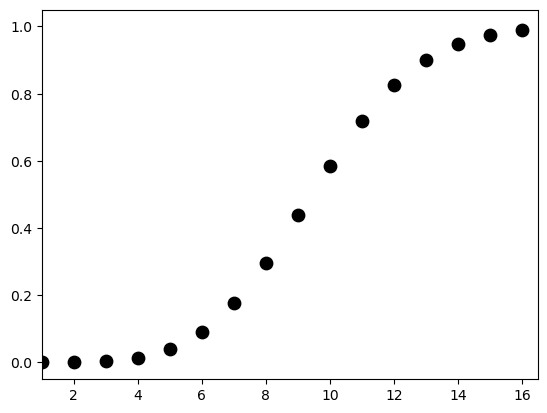

In [85]:
m, N, n = [50, 500, 100]
x = np.arange(0, m+1, 0.001)
x1 = np.arange(0, m+1)
x2 = np.arange(0, m) + 0.999

plt.scatter(x, hypergeom.cdf(x, n = m, M = N, N = n), color = 'r')
plt.scatter(x2, hypergeom.cdf(x2, n = m, M = N, N = n), color = 'white', edgecolor='black', s=80)
plt.scatter(x1, hypergeom.cdf(x1, n = m, M = N, N = n), color = 'black', edgecolor='black', s=80)
plt.xlim(1,16.5);

To find the left probability of a point use the code below:

''
hypergeom.cdf(X, n = m, M = N, N = n)
''

To find the right probability of a point use the code below:

''
hypergeom.sf(X, n = m, M = N, N = n)
''

In [86]:
X = 9
m, N, n = [50, 500, 100]
print(f'The left probability of *{X}* in the HG{N,m,n} Distribution is: ', hypergeom.cdf(X, n = m, M = N, N = n))
print(f'The Right probability of *{X}* in the HG{N,m,n} Distribution is: ', hypergeom.sf(X, n = m, M = N, N = n))

The left probability of *9* in the HG(500, 50, 100) Distribution is:  0.4377805207673867
The Right probability of *9* in the HG(500, 50, 100) Distribution is:  0.5622194792326133


To find the probability between two points $[X,Y]$ use the code below:

In [87]:
X = 5
Y = 8
m, N, n = [50, 500, 100]
xs = np.arange(X, Y+1)
print(f'The probability between *[{X}, {Y}]* in the HG{N,m,n} Distribution is: ', np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs]))

The probability between *[5, 8]* in the HG(500, 50, 100) Distribution is:  0.2812099969935373


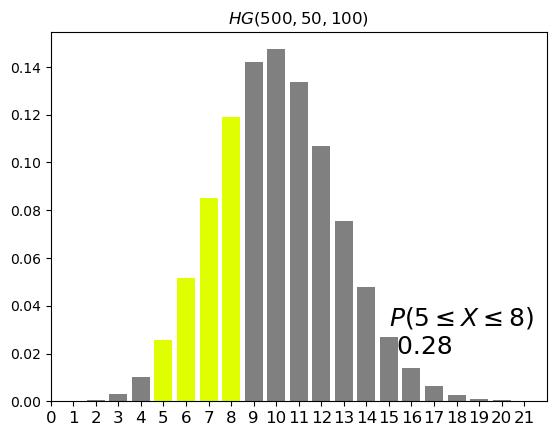

In [88]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y+1))
x3 = list(np.arange(Y+1,22))
plt.bar(x1, hypergeom.pmf(x1, n = m, M = N, N = n), color ='gray')
plt.bar(x2, hypergeom.pmf(x2, n = m, M = N, N = n), color ='#DFFF00')
plt.bar(x3, hypergeom.pmf(x3, n = m, M = N, N = n), color ='gray')
plt.xlim(0, 22)
plt.xticks(np.arange(0,22), fontsize=12, ha='center')
plt.title(f'$HG{N,m,n}$')
xs = np.arange(X, Y+1)
prob = np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs])
plt.text(15, 0.02, f'$P({np.round(X, 3)} \leq X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y)$ use the code below:

In [89]:
X = 5
Y = 8
m, N, n = [50, 500, 100]
xs = np.arange(X+1, Y)
print(f'The probability between *({X}, {Y})* in the HG{N,m,n} Distribution is: ', np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs]))

The probability between *(5, 8)* in the HG(500, 50, 100) Distribution is:  0.13660350069991276


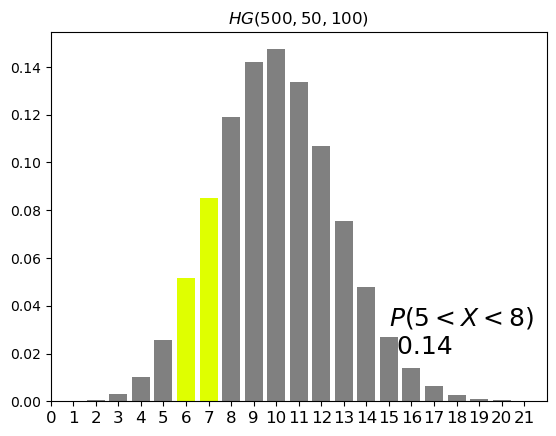

In [90]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y))
x3 = list(np.arange(Y,22))
plt.bar(x1, hypergeom.pmf(x1, n = m, M = N, N = n), color ='gray')
plt.bar(x2, hypergeom.pmf(x2, n = m, M = N, N = n), color ='#DFFF00')
plt.bar(x3, hypergeom.pmf(x3, n = m, M = N, N = n), color ='gray')
plt.xlim(0,22)
plt.xticks(np.arange(0,22), fontsize=12, ha='center')
plt.title(f'$HG{N,m,n}$')
xs = np.arange(X+1, Y)
prob = np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs])
plt.text(15, 0.02, f'$P({np.round(X, 3)} < X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $[X,Y)$ use the code below:

In [91]:
X = 5
Y = 8
m, N, n = [50, 500, 100]
xs = np.arange(X, Y)
print(f'The probability between *[{X}, {Y})* in the HG{N,m,n} Distribution is: ', np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs]))

The probability between *[5, 8)* in the HG(500, 50, 100) Distribution is:  0.1623105533635753


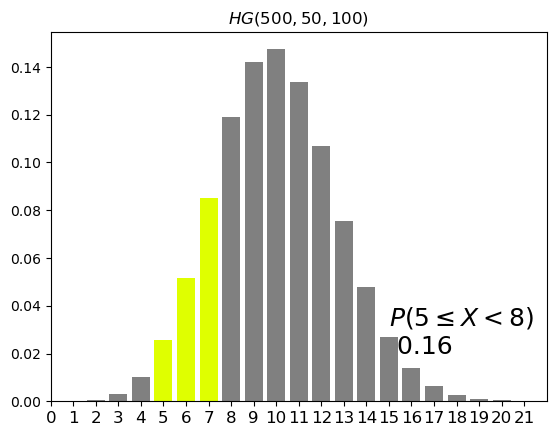

In [92]:
x1 = list(np.arange(0,X))
x2 = list(np.arange(X,Y))
x3 = list(np.arange(Y,22))
plt.bar(x1, hypergeom.pmf(x1, n = m, M = N, N = n), color ='gray')
plt.bar(x2, hypergeom.pmf(x2, n = m, M = N, N = n), color ='#DFFF00')
plt.bar(x3, hypergeom.pmf(x3, n = m, M = N, N = n), color ='gray')
plt.xlim(0,22)
plt.xticks(np.arange(0,22), fontsize=12, ha='center')
plt.title(f'$HG{N,m,n}$')
xs = np.arange(X, Y)
prob = np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs])
plt.text(15, 0.02, f'$P({np.round(X, 3)} \leq X < {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability between two points $(X,Y]$ use the code below:

In [93]:
X = 5
Y = 8
m, N, n = [50, 500, 100]
xs = np.arange(X+1, Y+1)
print(f'The probability between *({X}, {Y}]* in the HG{N,m,n} Distribution is: ', np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs]))

The probability between *(5, 8]* in the HG(500, 50, 100) Distribution is:  0.25550294432987475


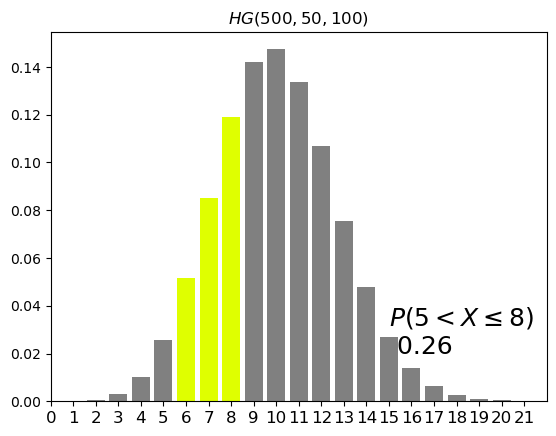

In [94]:
x1 = list(np.arange(0,X+1))
x2 = list(np.arange(X+1,Y+1))
x3 = list(np.arange(Y+1,22))
plt.bar(x1, hypergeom.pmf(x1, n = m, M = N, N = n), color ='gray')
plt.bar(x2, hypergeom.pmf(x2, n = m, M = N, N = n), color ='#DFFF00')
plt.bar(x3, hypergeom.pmf(x3, n = m, M = N, N = n), color ='gray')
plt.xlim(0,22)
plt.xticks(np.arange(0,22), fontsize=12, ha='center')
plt.title(f'$HG{N,m,n}$')
xs = np.arange(X+1, Y+1)
prob = np.sum([hypergeom.pmf(xs, n = m, M = N, N = n) for xs in xs])
plt.text(15, 0.02, f'$P({np.round(X, 3)} < X \leq {np.round(Y, 3)})$ \n {np.round(prob, 2)}', fontsize=18);

To find the probability of a point use the code below:

''
hypergeom.pmf(X, n = m, M = N, N = n)
''

In [95]:
X = 7
m, N, n = [50, 500, 100]
print(f'The probability of *X={X}* in the HG{N,m,n} Distribution is: ',  hypergeom.pmf(X, n = m, M = N, N = n))

The probability of *X=7* in the HG(500, 50, 100) Distribution is:  0.08515328996154319


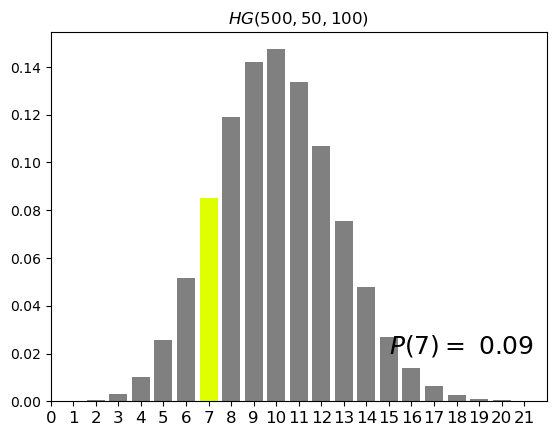

In [96]:
x1 = list(np.arange(0,X))
x2 = X
x3 = list(np.arange(X+1,22))
plt.bar(x1, hypergeom.pmf(x1, n = m, M = N, N = n), color ='gray')
plt.bar(x2, hypergeom.pmf(x2, n = m, M = N, N = n), color ='#DFFF00')
plt.bar(x3, hypergeom.pmf(x3, n = m, M = N, N = n), color ='gray')
plt.xlim(0,22)
plt.xticks(np.arange(0,22), fontsize=12, ha='center')
plt.title(f'$HG{N,m,n}$')
prob = hypergeom.pmf(x2, n = m, M = N, N = n)
plt.text(15, 0.02, f'$P({np.round(X, 3)}) = $ {np.round(prob, 2)}', fontsize=18);